<a href="https://colab.research.google.com/github/Ophineon/Winter2022MicroCred/blob/main/4_machine_learning_algorithims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [1]:
import numpy as np
import pandas as pd
!pip install pydot
!pip install pydot-ng
!pip install graphviz
!pip install --upgrade scikit-learn==0.20.3
import seaborn as sns
#for graphing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#model training import
from sklearn.preprocessing import StandardScaler
#scaling import
from sklearn.neighbors import KNeighborsClassifier
#classifiers import
from sklearn.metrics import classification_report, confusion_matrix
#evaluation imports
from sklearn.tree import DecisionTreeClassifier
#decision tree classifier import
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
#for more graphing
import pydot 
from sklearn.ensemble import RandomForestClassifier
#for the random forest algorithim

     |████████████████████████████████| 5.4 MB 23.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


#Loading Data

In [2]:
loans = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/loan_data.csv')
#I imported the the data and stored it as loans

#EDA

In [3]:
loans.head()
#viewing the data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()
#looking for null values and what data types I want to work with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()
#looking to see paterns

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.shape
#checking how many columns and rows there should be

(9578, 14)

In [9]:
ln = loans.drop(columns= 'purpose',inplace= False)
#dropping purpose column because the object data type
#also renaming in to ln to make it easier to type

In [10]:
ln['credit.policy'].value_counts
#the credit policy column has binary entries which means it can be used for classification
#we will use it to determine which people get the loan and which do not through the machine learning models

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: credit.policy, Length: 9578, dtype: int64>

In [11]:
X = ln.iloc[:,1:-1]
#get the data from every row but only for every column after Credit Policy

In [12]:
y = ln.iloc[:,0]
#get the data from Credit Policy

#KNN Implementation

In [13]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size =.30)
#Testing 30% of the data training 70%

In [14]:
#Now we will normalize the data through scaling
scaler = StandardScaler()
#initializing an instance of the scaler
scaler.fit(X_train)
#fit method is applied on data to find "line of best fit", basically it finds the mean and standard deviation 
X_train = scaler.transform(X_train)
#the transform method subtracts mean from all values and then divide it by std to scale the data
X_test = scaler.transform(X_test)
#scaling both the train and test data

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [15]:
classifier = KNeighborsClassifier(n_neighbors=8)
#intitializing an instance of the KNeighborsClassifier function as the variable classifier with default parameters
#and  nearest neighbors
classifier.fit(X_train,y_train)
#using the fit method on the classifier function with the training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [16]:
y_pred = classifier.predict(X_test)
#using the predict method on the classifier(instance of KNN), using the x test data to get the model to return predicted outcomes

##evaluation

In [17]:
# Now we evaluate the accuracy of the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.59      0.71      1299
           1       0.91      0.98      0.95      5405

   micro avg       0.91      0.91      0.91      6704
   macro avg       0.90      0.79      0.83      6704
weighted avg       0.91      0.91      0.90      6704

[[ 767  532]
 [  86 5319]]


In [18]:
error_rate=[]

for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'ERROR_RATE')

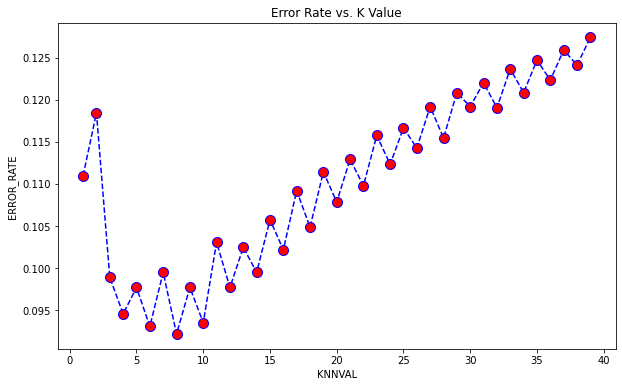

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel("KNNVAL")
plt.ylabel("ERROR_RATE")
#these label functions are FUNCTIONS do not assign the labels with an = sign or else you will get a
# str is not callable error
# sometimes you will get this error regardless of whether or not the mistake was made
#restarting the kernel is the only way to fix this

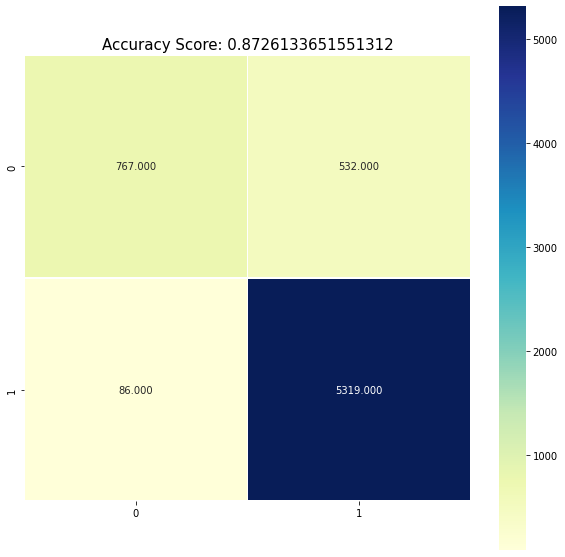

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test,y_test)}'
plt.title(all_sample_title, size = 15);
# this heatmap is just another visualization of our confusion matrix  and helps illustrate the accuaracy of our model's predictions

#Decision Tree Model

In [22]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
#here I make an instance of the decision tree classifier and give it the training data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
dtpred = dtree.predict(X_test)
print(classification_report(y_test, dtpred))
print(confusion_matrix(y_test, dtpred))
#using the test data to get predictions from the model
# evaluating the model through the confusion matrix and classification report

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1299
           1       0.99      0.99      0.99      5405

   micro avg       0.98      0.98      0.98      6704
   macro avg       0.98      0.97      0.97      6704
weighted avg       0.98      0.98      0.98      6704

[[1236   63]
 [  46 5359]]


In [24]:
feature_name = ln.columns[1:]
#this gives a value error because one of the columns is missing

In [25]:
features = [x[1:] for x in X]
#This gives the labels for all columns in X
#if you use X_test or X_Train it will give an error for not including all rows
#that is because the data is already split

In [26]:
class_names= ln.columns[0]
#this essentially just gives the Y label

In [27]:
class_names
#just testing

'credit.policy'

In [29]:
dtree
#tree instance

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
from sklearn import tree
#need this for tree making

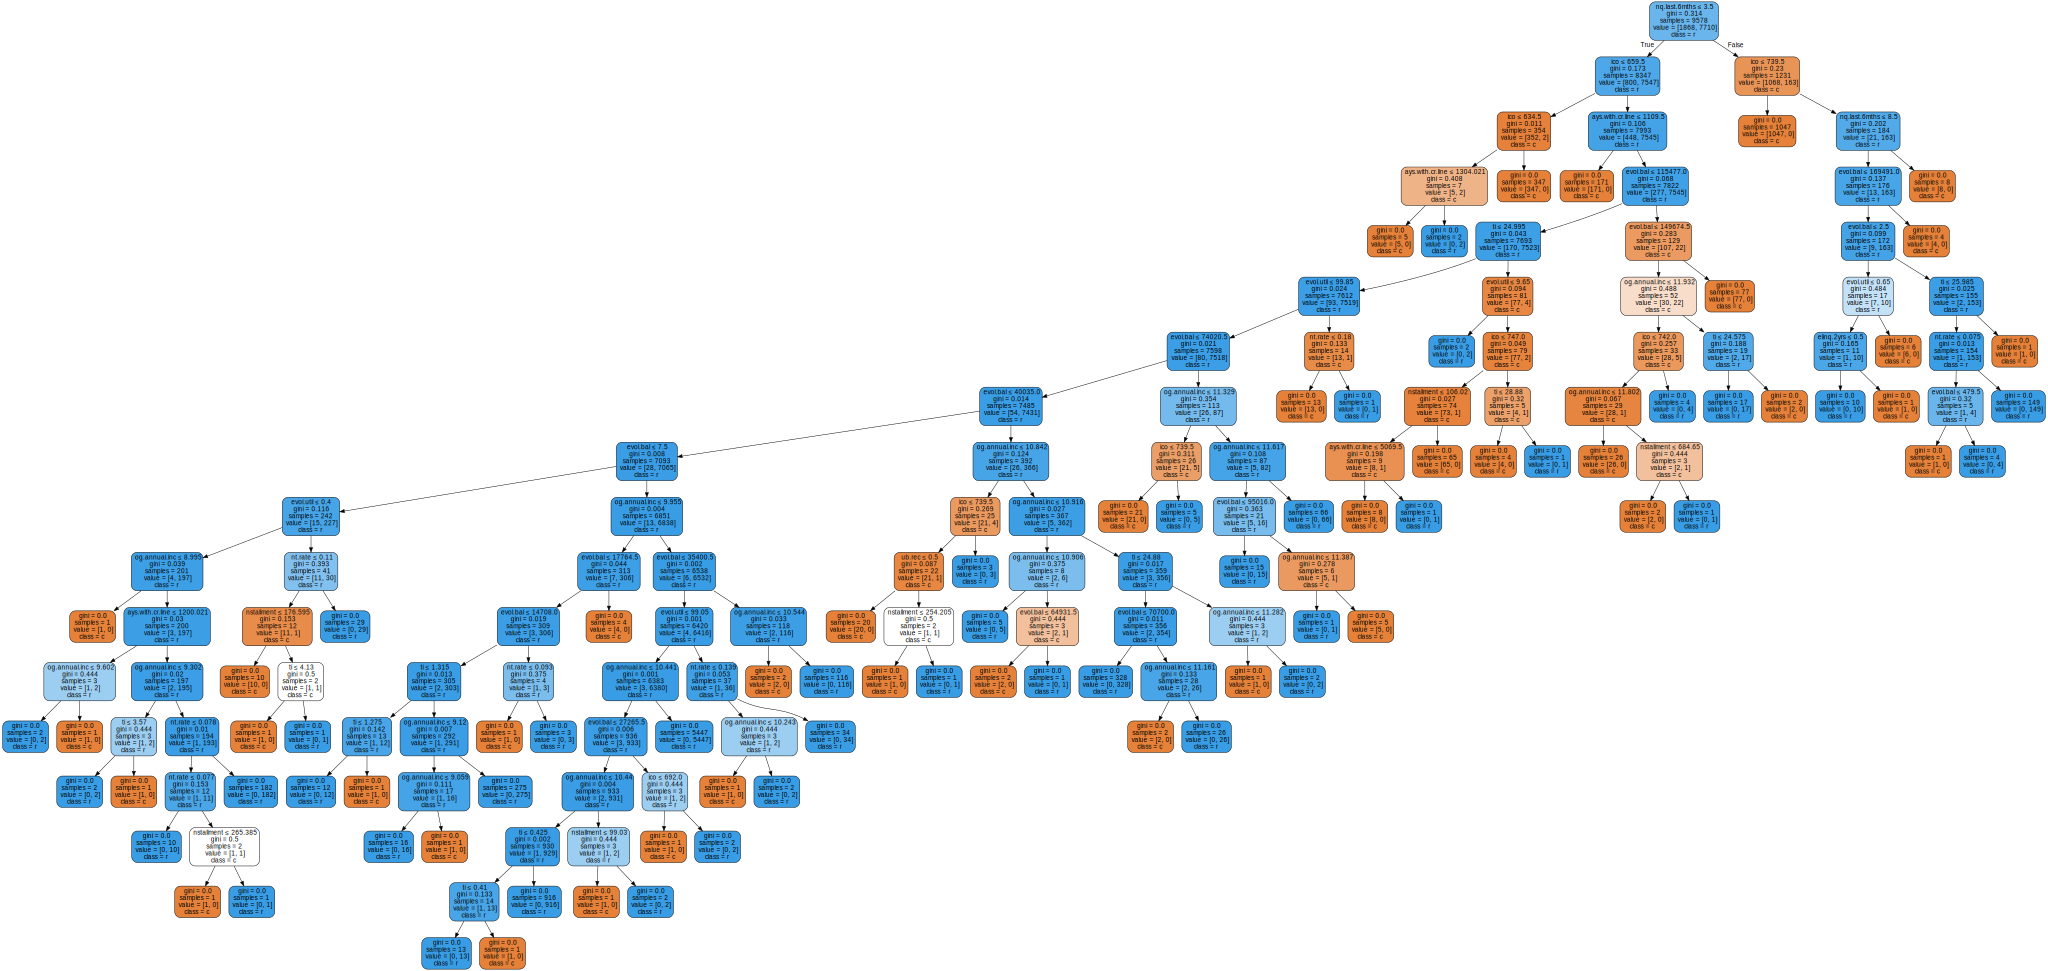

In [30]:
import graphviz as g
model = DecisionTreeClassifier()
#initialize
model.fit(X, y)
#fitting data
dot_data = tree.export_graphviz(model, 
                  feature_names=features,  
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
#making node data 
#uses column names for X and y on tree model
graph = g.Source(dot_data)
#graphs using the data placed in the nodes
graph
#displays graph

#gini is the measure of probability of a data point being wrongly attributed to a classification
#it is a good sign when gini is low

#

#Random Forest Algorithims

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
#generating an randomforestclassifier instance
#giving it the training data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))
#once again feeding the model some delicious testing data to get result and then evaluating the model

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.99      1.00      0.99      5391

   micro avg       0.99      0.99      0.99      6704
   macro avg       0.99      0.97      0.98      6704
weighted avg       0.99      0.99      0.99      6704

[[1245   68]
 [  17 5374]]


#Logistic Regression Algorithim

In [ ]:
from sklearn.linear_model import LogisticRegression
#importing the logistic regression model

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
#generating an instance of the logistic regresion model, naming it logmodel
#STUFFING THE MODEL FULL OF TRAINING DATA


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
logpred = logmodel.predict(X_test)
#naming the prediction results of the log model when given testing data logpred for easy remembering

In [ ]:
print(classification_report(y_test,logpred))
print(confusion_matrix(y_test, logpred))
#generating the confusion matrix and classification report to evaluate the model

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1313
           1       0.92      0.96      0.94      5391

   micro avg       0.90      0.90      0.90      6704
   macro avg       0.86      0.81      0.83      6704
weighted avg       0.90      0.90      0.90      6704

[[ 875  438]
 [ 221 5170]]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

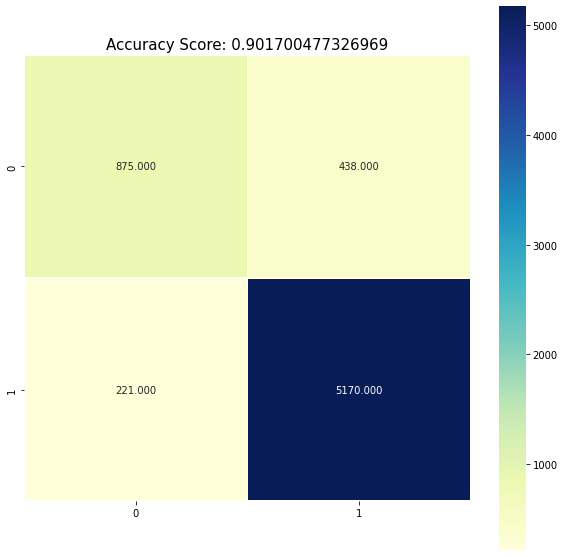

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, logpred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {logmodel.score(X_test,y_test)}'
plt.title(all_sample_title, size = 15);
#creating a heatmap to show the confusion matrix because it's engaging

#Conclusions Drawn

In [ ]:
#Out of all the models I generated, the RandomForest model was the most accurate at predicting 
#the people the would and would not receive the loan by classifying them into 1 of 2 categories of credit policy based on the other attributes they possessed.


In [ ]:
#From the 5-number summary given by the description function, and my observations of the credit policy's relation to fico credit score,
# the people who seem most likely to receive the loan had Fico credit scores near or greater than 700